In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
cd ..

/home/shibinbin/ibme/projects/Deepfold2


In [41]:
import pandas as pd

In [42]:
rfam_cmstat = pd.read_table('../../data/Rfam/13.0/Rfam.cmstat.txt', 
              comment='#', sep='\s+', header=None,
              names=['idx', 'name', 'accession', 'nseq', 'eff_nseq', 'clen', 'W', 'bps', 'bifs', 'model',
                     'rel_entropy_cm', 'rel_entropy_hmm'])
rfam_cmstat.loc[rfam_cmstat['rel_entropy_cm'] == '-', 'rel_entropy_cm'] = 'nan'
rfam_cmstat['rel_entropy_cm'] = rfam_cmstat['rel_entropy_cm'].astype('float')
#rfam_cmstat.loc[rfam_cmstat['rel_entropy_hmm'] == '-', 'rel_entropy_hmm'] = 'nan'
#rfam_cmstat['rel_entropy_hmm'] = rfam_cmstat['rel_entropy_hmm'].astype('float')
rfam_cmstat['clen'] = rfam_cmstat['clen'].astype(np.float64)
rfam_cmstat.head()

,idx,name,accession,nseq,eff_nseq,clen,W,bps,bifs,model,rel_entropy_cm,rel_entropy_hmm
0,1,5S_rRNA,RF00001,712,7.35,119.0,194,34,1,cm,0.590,0.370
1,2,5_8S_rRNA,RF00002,61,3.62,154.0,203,25,3,cm,0.590,0.471
2,3,U1,RF00003,100,4.43,166.0,197,40,3,cm,0.590,0.390
3,4,U2,RF00004,208,5.46,193.0,229,45,4,cm,0.590,0.398
4,5,tRNA,RF00005,954,67.04,71.0,259,21,2,cm,0.793,0.453


Text(0,0.5,'counts')

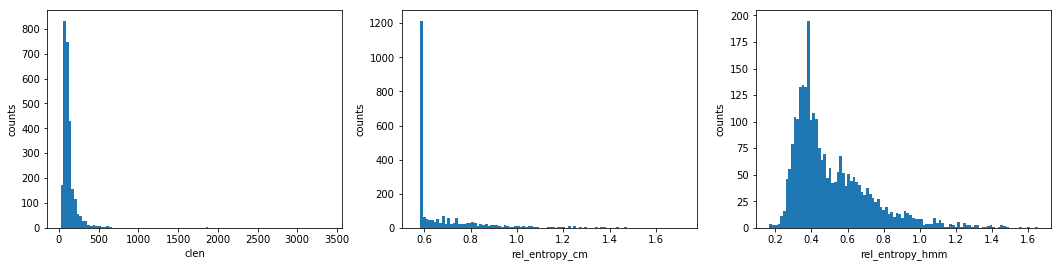

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes[0].hist(rfam_cmstat['clen'].dropna(), bins=100)
axes[0].set_xlabel('clen')
axes[0].set_ylabel('counts')
axes[1].hist(rfam_cmstat['rel_entropy_cm'].dropna(), bins=100)
axes[1].set_xlabel('rel_entropy_cm')
axes[1].set_ylabel('counts')
axes[2].hist(rfam_cmstat['rel_entropy_hmm'].dropna(), bins=100)
axes[2].set_xlabel('rel_entropy_hmm')
axes[2].set_ylabel('counts')

In [44]:
rfam_cmstat_sel = rfam_cmstat.query('50 < clen < 150')
rfam_cmstat_sel['name'].to_csv('metadata/rfam_selected_ids.txt', index=False, header=False)
rfam_cmstat_sel.head()

,idx,name,accession,nseq,eff_nseq,clen,W,bps,bifs,model,rel_entropy_cm,rel_entropy_hmm
0,1,5S_rRNA,RF00001,712,7.35,119.0,194,34,1,cm,0.590,0.370
4,5,tRNA,RF00005,954,67.04,71.0,259,21,2,cm,0.793,0.453
5,6,Vault,RF00006,73,4.46,101.0,302,19,0,cm,0.590,0.469
7,8,Hammerhead_3,RF00008,82,8.62,58.0,293,15,1,cm,0.961,0.722
13,14,DsrA,RF00014,5,1.25,85.0,103,29,2,cm,0.669,0.371
